In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [8]:
filename = 'ward.p'
with open(filename, 'rb') as file:
    data = pickle.load(file)
ward = pd.DataFrame(data)
ward.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [19]:
filename = 'census.p'
with open(filename, 'rb') as file:
    data = pickle.load(file)
census = pd.DataFrame(data)
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [10]:
wc = ward.merge(census, on='ward', suffixes=('_ward', '_census')) #one-to-one relationship
wc.head()

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_census,zip_census
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [15]:
wc['change'].value_counts()

change
-8%     4
-6%     4
-4%     4
-5%     3
3%      3
-17%    2
-13%    2
-11%    2
-14%    2
-3%     2
0%      2
6%      2
-24%    2
5%      2
-33%    1
-20%    1
1%      1
-9%     1
-10%    1
-16%    1
8%      1
-1%     1
-7%     1
12%     1
31%     1
-15%    1
-18%    1
-2%     1
Name: count, dtype: int64

In [18]:
filename = 'licenses.p'
with open(filename, 'rb') as file:
    data = pickle.load(file)
licenses = pd.DataFrame(data)
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [ ]:
wl = ward.merge(licenses, on='ward', suffixes=('_ward', '_licenses')) #one-to-many relationship
wl.head()

,ward,alderman,address_ward,zip_ward,account,aid,business,address_licenses,zip_licenses
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [23]:
filename = 'business_owners.p'
with open(filename, 'rb') as file:
    data = pickle.load(file)
bo = pd.DataFrame(data)
bo.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [29]:
lbo = licenses.merge(bo, on='account')
counted_lbo = lbo.groupby('title').agg({'account': 'count'})
sorted_counted_lbo = counted_lbo.sort_values(by='account', ascending=False)
sorted_counted_lbo.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


In [30]:
filename = 'financials.p'
with open(filename, 'rb') as file:
    data = pickle.load(file)
bo = pd.DataFrame(data)
bo.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [39]:
wlbo = ward.merge(licenses, on='ward', suffixes=('_ward', '_licenses'))\
    .merge(census, on='ward', suffixes=('_ward', '_census'))
wlbo.head()
# wlbo.shape

,ward,alderman,address_ward,zip_ward,account,aid,business,address_licenses,zip_licenses,pop_2000,pop_2010,change,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
2,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
3,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
4,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622,52951,56149,6%,2765 WEST SAINT MARY STREET,60647


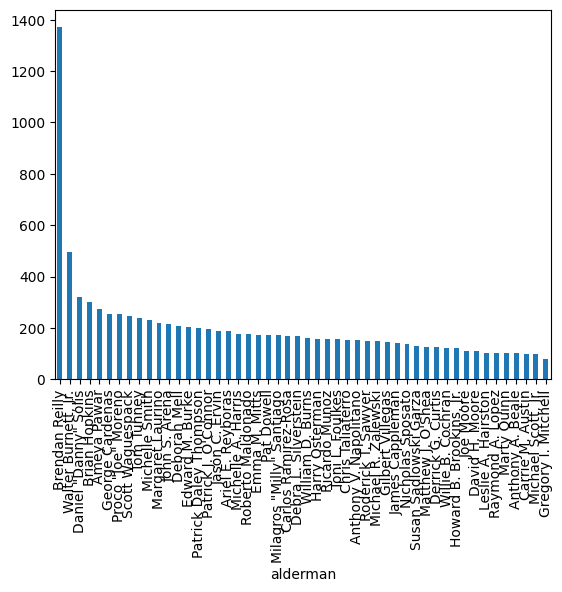

In [73]:
wlbo.groupby('alderman')['account'].agg('count').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [87]:
filter_crit = ((wlbo['alderman'] == 'Proco "Joe" Moreno') &
               (wlbo['zip_licenses'] == '60622'))
print(f'{wlbo.loc[filter_crit, 'pop_2010'].sum()} people in Proco "Joe" Moreno at 60622')

7074774 people in Proco "Joe" Moreno at 60622


In [88]:
filename = 'zip_demo.p'
with open(filename, 'rb') as file:
    data = pickle.load(file)
zip = pd.DataFrame(data)
zip.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [94]:
wlz = licenses.merge(zip, on='zip').merge(ward, on='ward')
wlz.groupby('alderman').agg({'income' : 'median'}).sort_values(by='income', ascending=False).head()

,income
alderman,
Brendan Reilly,110215.0
William D. Burns,107811.0
Michelle Smith,100116.0
Tom Tunney,88708.0
Brian Hopkins,87143.0


In [95]:
filename = 'land_use.p'
with open(filename, 'rb') as file:
    data = pickle.load(file)
land = pd.DataFrame(data)
land.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [97]:
land_cen_lic = land.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], as_index=False).agg({'account':'count'})
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=['vacant', 'account', 'pop_2010'], ascending=[False, True, True])
sorted_pop_vac_lic.head()

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156
